In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,SepallengthCm,SepalWidthCm,PetallengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,NaN,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,NaN,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

We have 150 rows and 5 columns in the dataset.

In [3]:
df.dtypes

SepallengthCm    float64
SepalWidthCm     float64
PetallengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

We have float type value in all independent variables
and Species is our targe variable where in we have classes

In [4]:
df.isnull().sum()

SepallengthCm    0
SepalWidthCm     3
PetallengthCm    0
PetalWidthCm     5
Species          0
dtype: int64

There are 3 missing values in SepalWidthCm and 5 missing values in PetalWidthCm

In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Thre are 3 unique values in df["Species"]

In [7]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# EDA

# Univariate Analysis

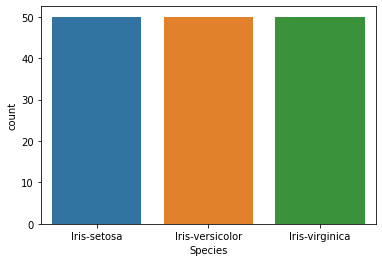

In [8]:
sn.countplot(df['Species']);

All 3 classes are equally distributed . There is no class imbalance exists

<AxesSubplot:xlabel='SepallengthCm', ylabel='Density'>

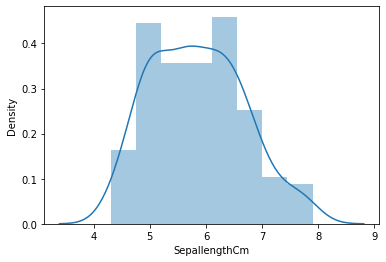

In [10]:
sn.distplot(df['SepallengthCm'])

Data is normally distributed in this column.

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

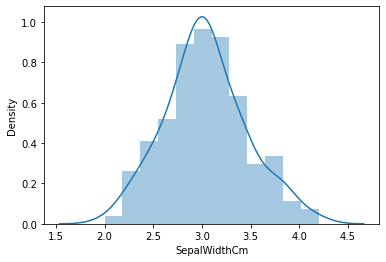

In [11]:
sn.distplot(df["SepalWidthCm"])

<AxesSubplot:xlabel='PetallengthCm', ylabel='Density'>

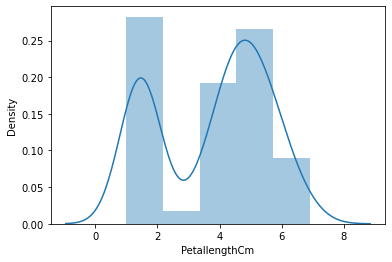

In [12]:
sn.distplot(df["PetallengthCm"])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

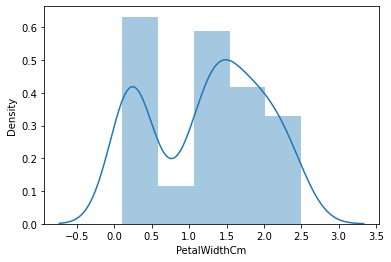

In [13]:
sn.distplot(df['PetalWidthCm'])

<AxesSubplot:xlabel='SepallengthCm'>

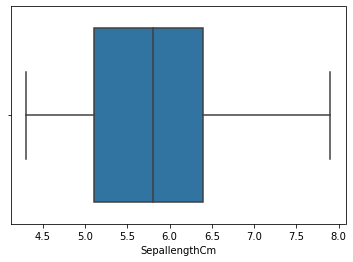

In [14]:
sn.boxplot(df['SepallengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

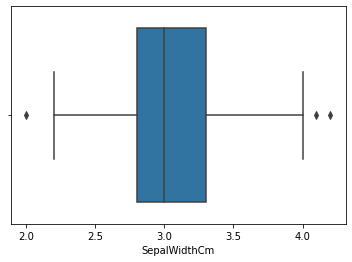

In [15]:
sn.boxplot(df['SepalWidthCm'])

<AxesSubplot:xlabel='PetallengthCm'>

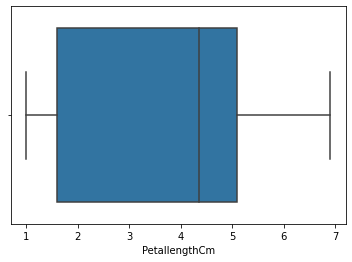

In [16]:
sn.boxplot(df['PetallengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

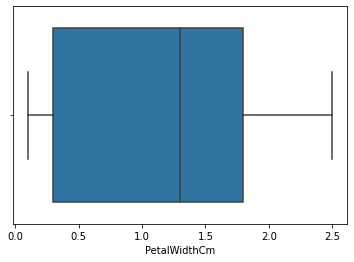

In [17]:
sn.boxplot(df['PetalWidthCm'])

Bi Variate Analysis

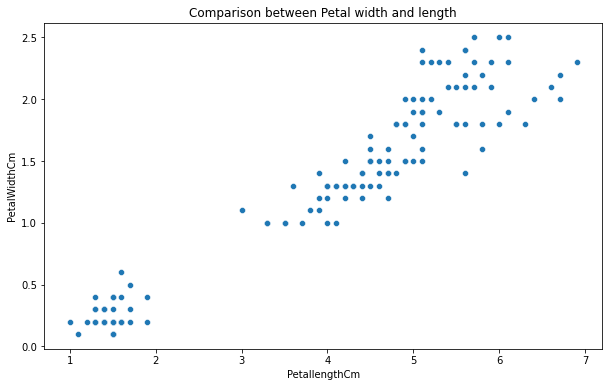

In [18]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Petal width and length')
sn.scatterplot(df['PetallengthCm'],df['PetalWidthCm']);

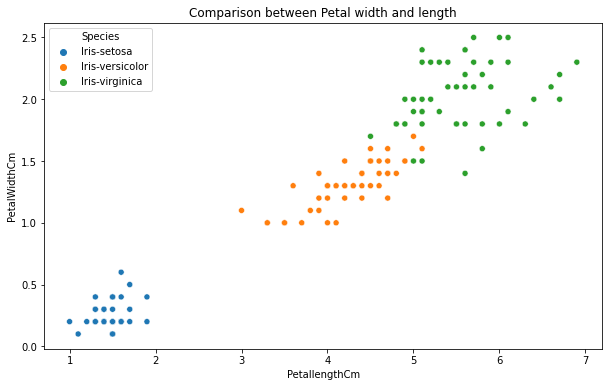

In [19]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Petal width and length')
sn.scatterplot(df['PetallengthCm'],df['PetalWidthCm'],hue=df['Species']);

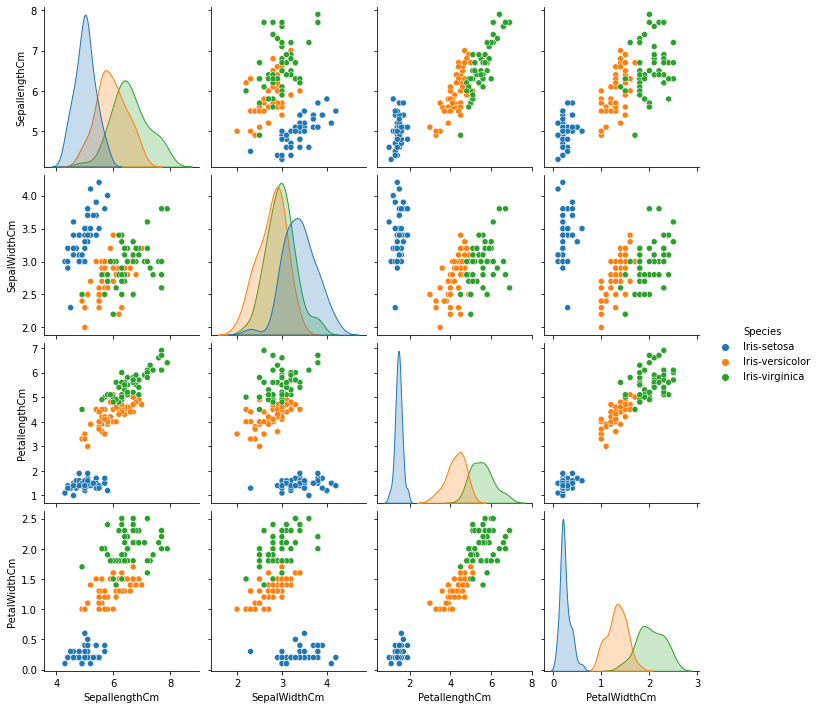

In [20]:
sn.pairplot(df,hue="Species")

In [29]:
cor=df.corr()

In [30]:
cor

,SepallengthCm,SepalWidthCm,PetallengthCm,PetalWidthCm,Species
SepallengthCm,1.000000,-0.095794,0.871754,0.818756,0.782561
SepalWidthCm,-0.095794,1.000000,-0.397861,-0.301537,-0.398640
PetallengthCm,0.871754,-0.397861,1.000000,0.960594,0.949043
PetalWidthCm,0.818756,-0.301537,0.960594,1.000000,0.954313
Species,0.782561,-0.398640,0.949043,0.954313,1.000000


<AxesSubplot:>

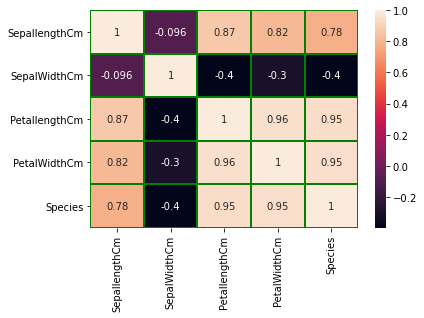

In [31]:
sn.heatmap(cor,annot=True,linewidths=1,linecolor='green')

# Found the Problem?

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Species']=LE.fit_transform(df['Species'])

In [25]:
df['Species'].unique()

array([0, 1, 2])

In [26]:
df.head()

,SepallengthCm,SepalWidthCm,PetallengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,NaN,0
3,4.6,3.1,1.5,0.2,0
4,5.0,NaN,1.4,0.2,0


# Missing value Treatment

In [32]:
df.isnull().sum()

SepallengthCm    0
SepalWidthCm     3
PetallengthCm    0
PetalWidthCm     5
Species          0
dtype: int64

In [33]:
df['SepalWidthCm']=df['SepalWidthCm'].fillna(df['SepalWidthCm'].mean())
df['PetalWidthCm']=df['PetalWidthCm'].fillna(df['PetalWidthCm'].median())

In [34]:
df.isnull().sum()

SepallengthCm    0
SepalWidthCm     0
PetallengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Outlier Removal

In [38]:
from scipy.stats import zscore

z=np.abs(zscore(df))


new_df=df [(z<3).all(axis=1) ]

In [39]:
new_df.shape

(150, 5)

In [40]:
df.shape

(150, 5)

In [41]:
(1/150)*100

0.6666666666666667

# Skewness

In [44]:
new_df.skew()

SepallengthCm    0.314911
SepalWidthCm     0.240230
PetallengthCm   -0.274464
PetalWidthCm    -0.181828
Species          0.000000
dtype: float64

In [45]:
x=new_df.drop('Species',axis=1)
y=new_df['Species']

In [47]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [50]:
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,'at random_state',i)

96.0 at random_state 0
96.0 at random_state 1
96.0 at random_state 2
96.0 at random_state 3
96.0 at random_state 4
96.0 at random_state 5
96.0 at random_state 6
96.0 at random_state 7
96.0 at random_state 8
96.0 at random_state 9
96.0 at random_state 10
96.0 at random_state 11
96.0 at random_state 12
96.0 at random_state 13
96.0 at random_state 14
96.0 at random_state 15
96.0 at random_state 16
96.0 at random_state 17
96.0 at random_state 18
96.0 at random_state 19
96.0 at random_state 20
96.0 at random_state 21
96.0 at random_state 22
96.0 at random_state 23
96.0 at random_state 24
96.0 at random_state 25
96.0 at random_state 26
96.0 at random_state 27
96.0 at random_state 28
96.0 at random_state 29
96.0 at random_state 30
96.0 at random_state 31
96.0 at random_state 32
96.0 at random_state 33
96.0 at random_state 34
96.0 at random_state 35
96.0 at random_state 36
96.0 at random_state 37
96.0 at random_state 38
96.0 at random_state 39
96.0 at random_state 40
96.0 at random_state 41
96

In [51]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is ",maxAccu,"on Random_State",maxRS)

Best accuracy is  0.9555555555555556 on Random_State 1
Best accuracy is  0.9777777777777777 on Random_State 4
Best accuracy is  1.0 on Random_State 9


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=6)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [54]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [57]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [60]:
sv=SVC()
sv.fit(x_train,y_train)
pred= sv.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9666666666666668


In [63]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.96


In [65]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.9666666666666666


# Hyper parameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [68]:
parameter={'max_depth':np.arange(2,10),
            'criterion':['gini','entropy']}

In [69]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [70]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [72]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [75]:
Final_mod = DecisionTreeClassifier(criterion='entropy',max_depth=4)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.11111111111111


# Saving the model 

In [76]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']